## <b><u><i><span style = "color:blue"> <span style = "font-family: Times New Roman"> Stock Market Prediction and Forecasting using Stacked LSTM </span>

### Importing Libraries and packages

In [1]:
from matplotlib import ticker 
import yfinance as yf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import time

#### Ticker Symbol

In [2]:
ticker_symbol = input("Enter the Stock Ticker Name :", )

In [3]:
ticker_Data = yf.Ticker(ticker_symbol)

#### Data Collection

In [4]:
ticker_Df = ticker_Data.history(period = '5y')

In [5]:
ticker_Df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-30,28.457303,28.622026,28.393767,28.622026,121510000,0.0,0.0
2017-01-31,28.509072,28.565548,28.384352,28.556135,196804000,0.0,0.0
2017-02-01,29.892757,30.706967,29.888051,30.297508,447940000,0.0,0.0
2017-02-02,30.116308,30.448109,30.069243,30.245733,134841600,0.0,0.0
2017-02-03,30.193966,30.401049,30.158670,30.375164,98029200,0.0,0.0


In [6]:
ticker_Df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-24,160.020004,162.300003,154.699997,161.619995,162706700,0.0,0.0
2022-01-25,158.979996,162.759995,157.020004,159.779999,115798400,0.0,0.0
2022-01-26,163.500000,164.389999,157.820007,159.690002,108275300,0.0,0.0
2022-01-27,162.449997,163.839996,158.279999,159.220001,116691400,0.0,0.0
2022-01-28,165.710007,170.350006,162.800003,170.330002,179485800,0.0,0.0


In [7]:
ticker_Df.shape

(1260, 7)

### Max Chart

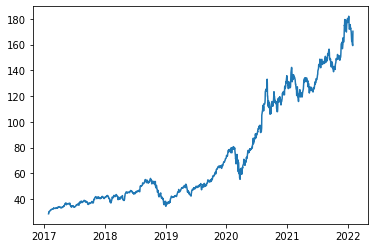

In [8]:
plt.plot(ticker_Df['Close'])

In [9]:
data = ticker_Df.reset_index()['Close']

In [10]:
data

0        28.622026
1        28.556135
2        30.297508
3        30.245733
4        30.375164
           ...    
1255    161.619995
1256    159.779999
1257    159.690002
1258    159.220001
1259    170.330002
Name: Close, Length: 1260, dtype: float64

### Scaling the data

In [16]:
from sklearn.preprocessing import MinMaxScaler
SC = MinMaxScaler(feature_range = (0 , 1))
data = SC.fit_transform(np.array(data).reshape(-1 , 1))

In [17]:
data.shape

(1260, 1)

### Splitting the dataset into train and test split

In [18]:
training_size = int(len(data) * 0.80)
test_size = len(data) - training_size

train_data , test_data = data[0 : training_size, : ], data[training_size : len(data) , : 1]

In [19]:
training_size , test_size

(1008, 252)

#### Creating a data structure with 120 timestamps and 1 output

In [21]:
x_train = []
y_train = []

for i in range(120 , 1008) :
    x_train.append(train_data[i - 120 : i , 0])
    y_train.append(train_data[i , 0])
    
x_train , y_train = np.array(x_train) , np.array(y_train)

#### Reshaping 

In [23]:
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , 1))

In [24]:
x_train.shape , y_train.shape

((888, 120, 1), (888,))

## <b><u><i> Building the RNN

### Importing keras libraries and packages

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### Initializing the RNN

In [26]:
regressor = Sequential()

#### Adding the first LSTM layer and some Dropout Regularisation 

In [27]:
regressor.add(LSTM(units = 80 , return_sequences= True , input_shape = (x_train.shape[1] , 1)))
regressor.add(Dropout(0.2))

#### Adding a Second layer and some Droput Regularisation

In [28]:
regressor.add(LSTM(units = 80 , return_sequences= True))
regressor.add(Dropout(0.2))

#### Adding a Third layer and some Dropout Regularisation

In [29]:
regressor.add(LSTM(units = 80 , return_sequences= True))
regressor.add(Dropout(0.2))

#### Adding a Fourth layer and some Dropout Regularisation

In [30]:
regressor.add(LSTM(units = 80))
regressor.add(Dropout(0.2))

#### Adding the output layer

In [31]:
regressor.add(Dense(units = 1))

#### Compiling the RNN

In [32]:
regressor.compile(optimizer= 'adam' , loss = 'mean_squared_error')

#### Summary of the model

In [33]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 80)           26240     
                                                                 
 dropout (Dropout)           (None, 120, 80)           0         
                                                                 
 lstm_1 (LSTM)               (None, 120, 80)           51520     
                                                                 
 dropout_1 (Dropout)         (None, 120, 80)           0         
                                                                 
 lstm_2 (LSTM)               (None, 120, 80)           51520     
                                                                 
 dropout_2 (Dropout)         (None, 120, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 80)                5

#### Fitting the RNN to the Training set

In [34]:
regressor.fit(x_train , y_train, epochs = 100 , batch_size = 32 , verbose = 1)

Epoch 1/100
28/28 [==============================] - 22s 288ms/step - loss: 0.0115
Epoch 2/100
28/28 [==============================] - 8s 281ms/step - loss: 0.0017
Epoch 3/100
28/28 [==============================] - 8s 287ms/step - loss: 0.0015
Epoch 4/100
28/28 [==============================] - 8s 296ms/step - loss: 0.0015
Epoch 5/100
28/28 [==============================] - 8s 285ms/step - loss: 0.0014
Epoch 6/100
28/28 [==============================] - 8s 282ms/step - loss: 0.0014
Epoch 7/100
28/28 [==============================] - 9s 306ms/step - loss: 0.0014
Epoch 8/100
28/28 [==============================] - 11s 397ms/step - loss: 0.0014
Epoch 9/100
28/28 [==============================] - 8s 283ms/step - loss: 0.0015
Epoch 10/100
28/28 [==============================] - 8s 286ms/step - loss: 0.0013
Epoch 11/100
28/28 [==============================] - 8s 297ms/step - loss: 0.0011
Epoch 12/100
28/28 [==============================] - 10s 341ms/step - loss: 0.0013
Epoch 13/1

## <b><u><i> Making the prediction and visualising the results

#### Getting the real stock price

In [150]:
Unscaled_data = ticker_Df.reset_index()['Close']
Unscaled_data = np.array(Unscaled_data).reshape(-1 , 1)

Unscaled_train_data , Unscaled_test_data = Unscaled_data[0 : training_size, : ], Unscaled_data[training_size : len(Unscaled_data) , : 1]

#### Getting the predicted Stock Price

In [159]:
Total_data = ticker_Df.reset_index()['Close']
input = Total_data[len(Total_data) - len(test_data) - 120 :].values
input = input.reshape(-1,1)
input = SC.transform(input)

x_test = []
for i in range(120 , 373) :
    x_test.append(input[i - 120 : i , 0])

x_test = np.array(x_test)


x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1))

#### Predicted Stock Price

In [160]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = SC.inverse_transform(predicted_stock_price)

## <b><u><i> Visualising 

In [162]:
len(Total_data) - len(test_data)

1008

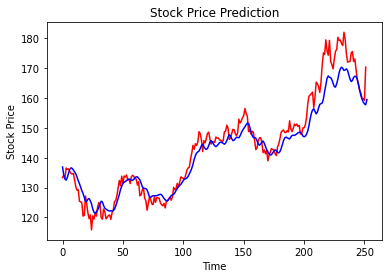

In [165]:
plt.plot(Total_data[len(Total_data) - len(test_data):].values, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price , color = 'blue', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel("Stock Price")
plt.title('Stock Price Prediction')
plt.show()

* <b><u><i><span style = "color:red"> <span style = "font-family: Times New Roman"> <font size = 50 > Red represents original stock graph <span> </font>

* <b><u><i><span style = "color:blue"> <span style = "font-family: Times New Roman"> <font size = 50 > Blue represents predicted stock graph <span> </font>

## <b><u><i> Plotting 

In [131]:
test_data.shape

(252, 1)

In [136]:
x_input = test_data[132:].reshape(1,-1)
x_input.shape

(1, 120)

In [137]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

## <b><u><i> Prediction for next 30 days

In [138]:
from numpy import array

lst_output = []
n_steps = 120
i = 0
while(i < 30):
    
    if(len(temp_input)>120):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i , x_input))
        x_input = x_input.reshape(1 , -1)
        x_input = x_input.reshape((1 , n_steps , 1))
        #print(x_input)
        yhat = regressor.predict(x_input, verbose=0)
        print("{} day output {}".format(i , yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = regressor.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1
    

[0.85311234]
121
1 day input [0.7630391  0.78275571 0.78412225 0.79726656 0.791215   0.76629264
 0.76850508 0.77820076 0.78809163 0.78750585 0.77930688 0.77397106
 0.78086872 0.8102808  0.80188664 0.80631142 0.81372952 0.81795922
 0.83351126 0.82323001 0.81646261 0.78327625 0.78705043 0.77774514
 0.78366664 0.7821049  0.76434052 0.74403834 0.74722674 0.76297407
 0.76935108 0.76993666 0.7598506  0.73733597 0.7433226  0.73466811
 0.74215125 0.71931127 0.73213032 0.73792165 0.74631581 0.74377801
 0.74319244 0.73473315 0.7308289  0.74937415 0.75640187 0.76752902
 0.78190971 0.78516334 0.78659482 0.78145429 0.78112894 0.78555383
 0.78249548 0.80670191 0.7886772  0.78321122 0.79010878 0.79967429
 0.79622546 0.79974439 0.79427046 0.79668158 0.77784856 0.77752271
 0.791338   0.79140313 0.79791975 0.81414616 0.84268887 0.86015346
 0.86321628 0.86575775 0.86921155 0.83578128 0.85813332 0.89110739
 0.88765359 0.88107174 0.86855985 0.89123775 0.92942503 0.95483989
 0.95145122 0.98331748 0.95914088

In [192]:
day_new = np.arange(1 , 121)
day_pred = np.arange(121 , 151)

In [193]:
len(data) - 120

1140

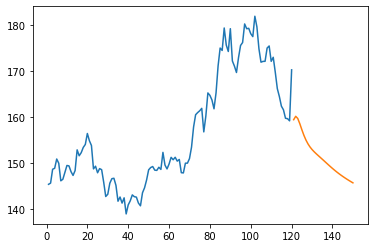

In [217]:
plt.plot(day_new, SC.inverse_transform(data[1140:]))
plt.plot(day_pred, SC.inverse_transform(lst_output))

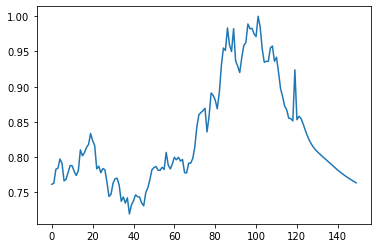

In [212]:
df3 = data.tolist()
df3.extend(lst_output)
plt.plot(df3[1140:])

In [213]:
df3 = SC.inverse_transform(df3).tolist()

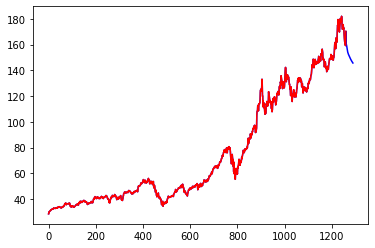

In [225]:
plt.plot(df3 , color = 'blue')
plt.plot(ticker_Df['Close'].values , color = 'red')